In [1]:
import nltk

In [2]:
#nltk.download('punkt')

In [3]:
#nltk.download('stopwords')

In [4]:
#nltk.download('averaged_perceptron_tagger')

In [5]:
#nltk.download()

In [6]:
from nltk import punkt

In [7]:
from nltk.corpus import stopwords

In [8]:
import matplotlib.pyplot as plt

description ici

def main ici


ouvrir le txt document et le transformer en string

In [9]:
def text_to_string(filename):
    with open(filename) as infile:
        return infile.read()

"""Return dictionary of tokenized words by corpus by book.egalement on a besoin de mettre tous les token en lower case

In [10]:
def make_word_dict(strings_from_book):
    
    words_from_book = dict()
    for book in strings_from_book:
        tokens = nltk.word_tokenize(strings_from_book[book])
        words_from_book[book] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_from_book

In [11]:
strings_from_book = dict()
strings_from_book['Frankenstein'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/frankenstein.txt')
strings_from_book['Last Man'] = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/LastMan.txt')

print(strings_from_book['Frankenstein'][:300]) 



Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my w


In [12]:
frankenstein = text_to_string('/Users/marcela/Documents/GitHub/stylometry/txt/frankenstein.txt')

In [13]:
LINES = ['-', ':', '--']
words_from_book = make_word_dict(strings_from_book)

In [14]:
def find_shortest_corpus(words_by_author):
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.
              format(author, len(words_by_author[author])))
    len_shortest_corpus = min(word_count)
    print('length shortest corpus = {}\n'.format(len_shortest_corpus))
    
    return len_shortest_corpus

In [15]:
def stopwords_test(words_from_book, frankenstein):
    stopwords_by_book_freq_dist = dict()
    plt.figure(2)
    stop_words = set(stopwords.words('english'))  # Use set for speed.
    print('Number of stopwords = {}\n'.format(len(stop_words)))
    print('Stopwords = {}\n'.format(stop_words))
    for i, book in enumerate(words_from_book):
        stopwords_by_book = [word for word in words_from_book[book]
        [:len_shortest_corpus] if word in stop_words]
        stopwords_by_book_freq_dist[book] = nltk.FreqDist(stopwords_by_book)
        stopwords_by_book_freq_dist[book].plot(50,
                                                   label=book,
                                                   linestyle=LINES[i],
                                                   title=
                                                   '50 Most Common Stopwords')
    plt.legend()


plt.show()

In [16]:
len_shortest_corpus = find_shortest_corpus(words_from_book)


Number of words for Frankenstein = 74564


Number of words for Last Man = 173034

length shortest corpus = 74564



Number of stopwords = 179

Stopwords = {'who', 'them', 'be', 'were', 'because', 'from', 'there', "shan't", 'what', 'shouldn', "weren't", 'wouldn', "you'll", 'hers', 'a', 'was', 'hadn', 'just', 've', "it's", 'such', 's', "needn't", 'on', 'her', 'ourselves', "doesn't", 'i', 'off', 'up', 'why', 'it', 're', 'won', 'where', 'too', 'the', 'with', 'hasn', 'in', 'of', 'ain', 'our', 'not', "aren't", 'he', 'this', 'weren', 'until', 'his', 'my', 'these', 'both', "isn't", 'whom', 'very', 'your', 'if', 'while', 'wasn', 'myself', 'only', 'can', 'same', 'above', "mustn't", 'doing', 'any', 'by', "should've", 'to', "you'd", 'down', 'again', 'itself', 'few', 'and', "didn't", 'all', 'haven', 'ma', "she's", 'have', "couldn't", 'between', 'at', 'they', 'once', 'then', 'how', 'out', 'as', 'which', 'she', 'below', 'here', 'yourself', "wasn't", 'during', 'couldn', 'now', 'is', 'those', 'into', 't', 'am', "wouldn't", 'own', 'further', 'more', 'him', 'theirs', 'needn', 'yourselves', "don't", 'herself', 'don', '

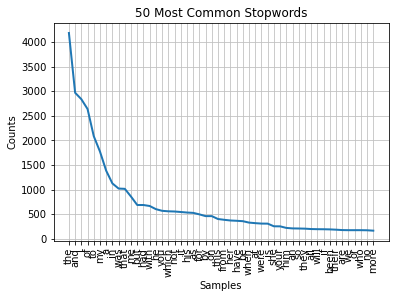

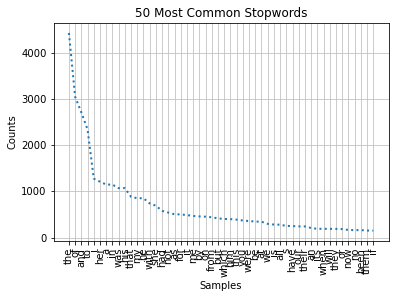

No handles with labels found to put in legend.


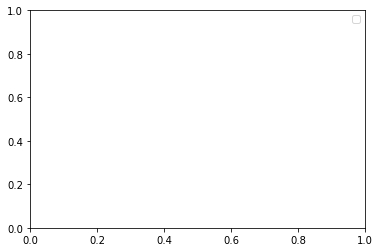

In [17]:
stopwords_test(words_from_book, len_shortest_corpus)